In [92]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [93]:
def read_data(filename):
    data = pd.read_csv(filename)
    y = data.iloc[:, -1:]
    yReal = []
    xReal = []
    for i in data.index:
        if y["class"][i] == 'P':
            yReal.append(-1)
        else:
            yReal.append(1)
        #print(data["x"][i], data["y"][i])
        xReal.append(np.array([data["x"][i], data["y"][i]]))
    return np.array(xReal), np.array(yReal)

In [104]:
class AdaBoost:
    def __init__(self):
        self.classifiers = []
        self.best_trees = []
        self.errors = []

    def fit_one(self, X, y, weights):
        cur_classifier = DecisionTreeClassifier(max_depth=5)
        cur_classifier.fit(X,y,sample_weight=weights)
        self.classifiers.append(cur_classifier)
        scores = np.array([1 - t.score(X, y, weights) for t in self.classifiers])
        min_ind = np.argmin(scores)
        self.best_trees.append(self.classifiers[min_ind])
        error = scores[min_ind]
        alpha = 0.5 * np.log((1 - error) / error)
        y_pred = self.best_trees[-1].predict(X)
        self.errors.append(error)
        new_weights = np.array([weights[i] * np.exp(-alpha * y[i] * y_pred[i]) for i in range(len(weights))])
        new_weights /= np.sum(new_weights)
        return new_weights

    def fit(self, X, y, steps):
        a = [1.0 / len(X)] * len(X)
        weights = np.array(a)
        for i in range(steps):
            weights = self.fit_one(X, y, weights)
        return weights

    def predict(self, X):
        arr = []
        #print(X)
        for i in range(len(self.best_trees)):
            arr.append(self.best_trees[i].predict(X) * self.errors[i])
        return np.sign(np.sum(arr))

In [105]:
def draw(pts, res, X, y, step):
    ptsGreenx = []
    ptsRedx = []
    ptsGreeny = []
    ptsRedy = []
    for i in range(len(pts)):
        t = res[i]
        if t == 1:
            ptsGreenx.append(pts[i][0])
            ptsGreeny.append(pts[i][1])
        else:
            ptsRedx.append(pts[i][0])
            ptsRedy.append(pts[i][1])
    greenXx = []
    redXx = []
    greenXy = []
    redXy = []
    for i in range(len(X)):
        if y[i] == -1:
            redXx.append(X[i][0])
            redXy.append(X[i][1])
        else:
            greenXx.append(X[i][0])
            greenXy.append(X[i][1])
    plt.title("After step:" + str(step))
    plt.scatter(greenXx, greenXy, marker='.', s = 30, color = 'green')
    plt.scatter(redXx, redXy, marker='.', s = 30, color='red')
    plt.scatter(ptsRedx, ptsRedy, marker='.',color='red', alpha = 0.14)
    plt.scatter(ptsGreenx, ptsGreeny, marker='.',color='green', alpha=0.14)
    plt.show()

In [109]:
def calc(X, y):
    Q = 110
    xmin = X[0][0]
    xmax = X[0][0]
    ymin = X[0][1]
    ymax = X[0][1]
    for t in X:
        xmin = min(xmin, t[0])
        xmax = max(xmax, t[0])
        ymin = min(ymin, t[1])
        ymax = max(ymax, t[1])
    delta_x =  (xmax - xmin) / Q
    delta_y = (ymax - ymin) / Q
    pts = []
    for i in range(Q):
        for j in range(Q):
            pts.append([xmin + i * delta_x, ymin + j * delta_y])
    steps = [2, 3, 5, 8, 13, 21, 34, 55]
    j = 0
    a = [1.0 / len(X)] * len(X)
    weights = np.array(a)
    tree = AdaBoost()
    total_pred = []
    xs = []
    for step in steps:
        predicted = []
        y_pred = []
        while (j < step):
            weights = tree.fit_one(X, y, weights)
            j += 1
            cur = []
            for i in range(len(X)):
                v = []
                v.append(X[i])
                cur.append(tree.predict(v))
            score = accuracy_score(y, cur)
            xs.append(j)
            total_pred.append(score)
        for i in pts:
            v = []
            v.append(i)
            t = tree.predict(v)
            predicted.append(t)
        for i in range(len(X)):
            v = []
            v.append(X[i])
            y_pred.append(tree.predict(v))
        score = accuracy_score(y, y_pred)
        print("Accuracy_score:", score)
        draw(pts, predicted, X, y, step)
    plt.plot(xs, total_pred)
    plt.ylabel("Accuracy")
    plt.xlabel("Step")
    plt.show()

In [110]:
XChips, YChips = read_data("chips.csv")
XGeyser, YGeyser = read_data("geyser.csv")

In [ ]:
steps = [2, 3, 5, 8, 13, 21, 34, 55]
calc(XChips, YChips)

In [ ]:
calc(XGeyser, YGeyser)

Accuracy_score: 0.864406779661017


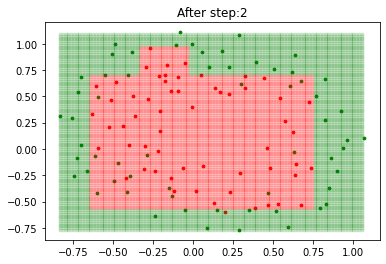

Accuracy_score: 0.9576271186440678


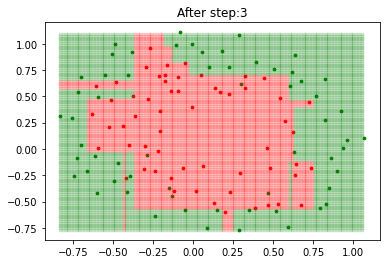

Accuracy_score: 0.9576271186440678


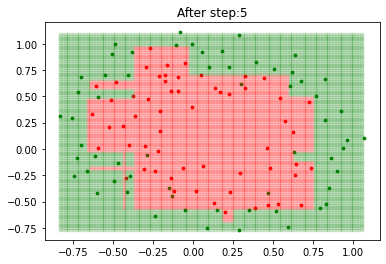

Accuracy_score: 0.9661016949152542


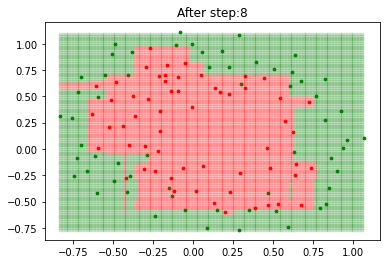

Accuracy_score: 1.0


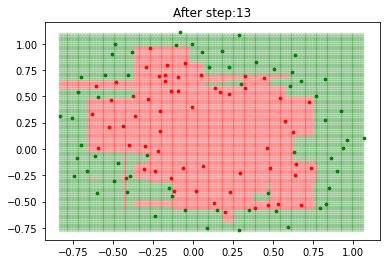

Accuracy_score: 1.0


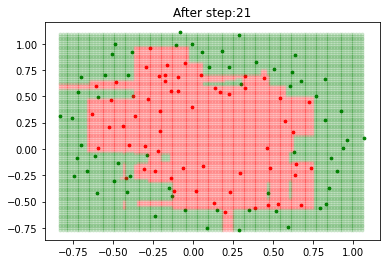

Accuracy_score: 1.0


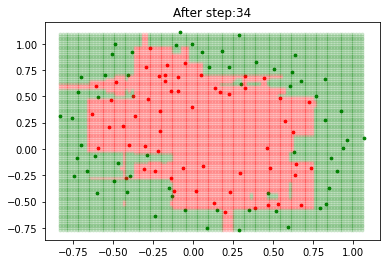

Accuracy_score: 1.0


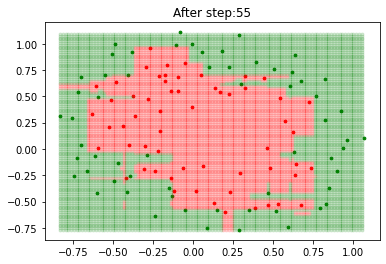

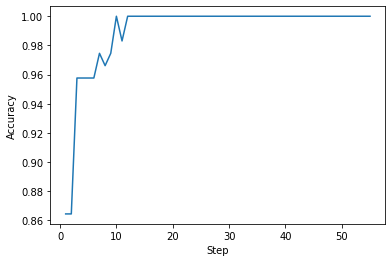

Accuracy_score: 0.8153153153153153


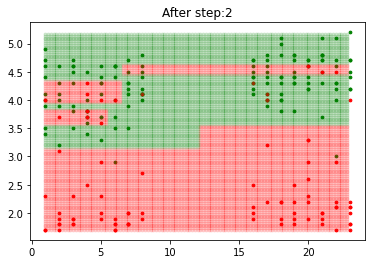

Accuracy_score: 0.9279279279279279


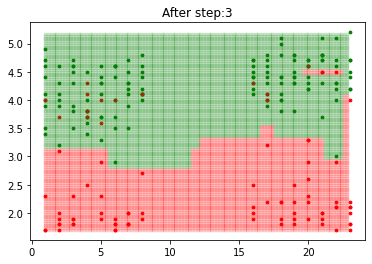

Accuracy_score: 0.8963963963963963


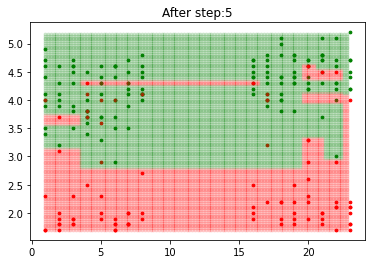

Accuracy_score: 0.9234234234234234


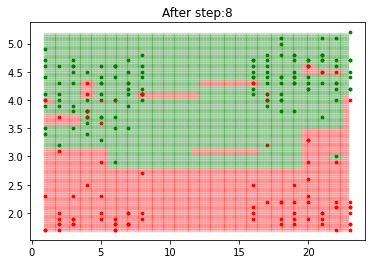

Accuracy_score: 0.9459459459459459


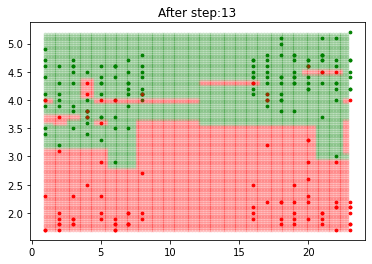

Accuracy_score: 0.9369369369369369


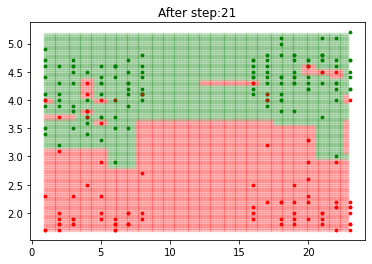

Accuracy_score: 0.9234234234234234


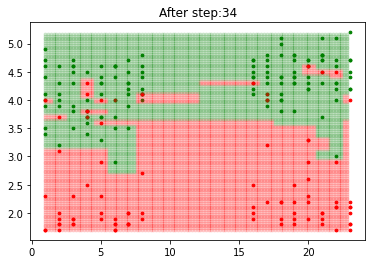

Accuracy_score: 0.9279279279279279


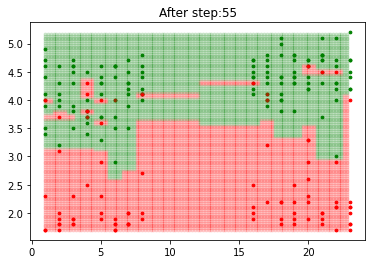

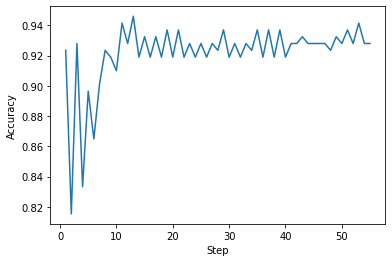

In [112]:
calc(XGeyser, YGeyser)